<a href="https://colab.research.google.com/github/sanjanabuva2506-stack/electrical_CCA/blob/main/CCA_electrical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------ THEORETICAL RESULTS ------
Inductive Reactance (XL)     = 5.027 Ω
Capacitive Reactance (XC)    = 21.221 Ω
Impedance (Z)                = 27.318 Ω
Current (Irms)               = 8.419 A
Power Factor (PF)            = 0.805
Real Power (P)               = 1559.533 W
Reactive Power (Q)           = -1147.966 VAR
Apparent Power (S)           = 1936.483 VA

------ SIMULATION RESULTS ------
Current RMS (sim)            = 7.790 A
Power (P_sim)                = 1421.043 W
Reactive Power (Q_sim)       = 1091.388 VAR
Apparent Power (S_sim)       = 1791.785 VA
Power Factor (sim)           = 0.793

------ COMPARISON TABLE ------
Quantity             Theory          Simulation
Irms (A)             8.419         7.790
Power P (W)          1559.533         1421.043
Reactive Q (VAR)     -1147.966         1091.388
Apparent S (VA)      1936.483         1791.785
Power Factor         0.805         0.793


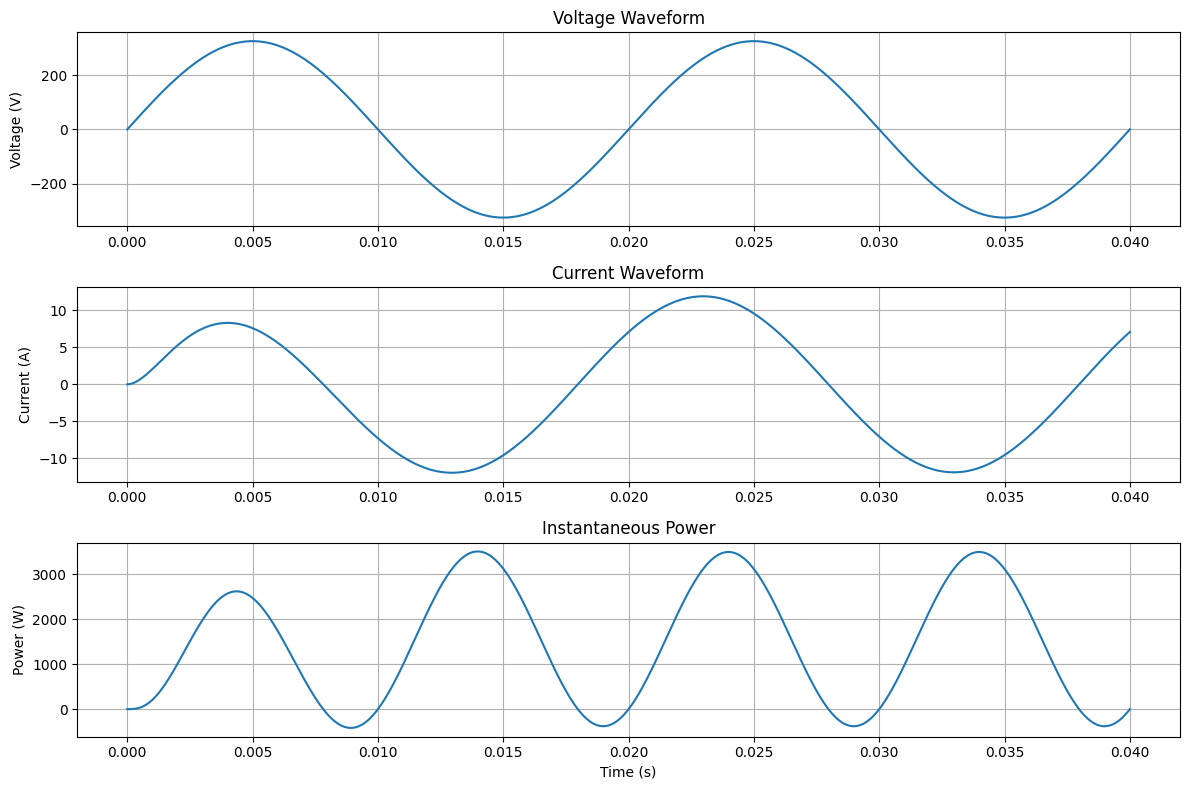

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# GIVEN PARAMETERS
# ------------------------------
R = 22          # Ohms  (replace YY with actual R value)
L = 16e-3       # H
C = 150e-6      # F
Vs = 230        # V (rms)
f = 50          # Hz
w = 2 * np.pi * f

# ------------------------------
# 1) THEORETICAL CALCULATIONS
# ------------------------------

# Impedances
XL = w * L
XC = 1 / (w * C)
Z = np.sqrt((R)**2 + (XL - XC)**2)

I_rms = Vs / Z
I_peak = I_rms * np.sqrt(2)

# Power calculations
phi = np.arctan((XL - XC) / R)
PF = np.cos(phi)

P = Vs * I_rms * PF            # Real power
Q = Vs * I_rms * np.sin(phi)   # Reactive power
S = Vs * I_rms                 # Apparent power

print("------ THEORETICAL RESULTS ------")
print(f"Inductive Reactance (XL)     = {XL:.3f} Ω")
print(f"Capacitive Reactance (XC)    = {XC:.3f} Ω")
print(f"Impedance (Z)                = {Z:.3f} Ω")
print(f"Current (Irms)               = {I_rms:.3f} A")
print(f"Power Factor (PF)            = {PF:.3f}")
print(f"Real Power (P)               = {P:.3f} W")
print(f"Reactive Power (Q)           = {Q:.3f} VAR")
print(f"Apparent Power (S)           = {S:.3f} VA")
print()

# ------------------------------
# 2) TIME-DOMAIN SIMULATION
# ------------------------------

t = np.linspace(0, 0.04, 5000)   # simulate for 2 cycles
v_in = np.sqrt(2) * Vs * np.sin(w * t)  # source voltage (peak)

# Differential equation for series RLC:
# v_in = L di/dt + R i + (1/C) ∫ i dt

# Numerical simulation of current
dt = t[1] - t[0]
i = np.zeros_like(t)
vc = 0  # capacitor voltage initial

for k in range(1, len(t)):
    # Using Euler method for integration
    di_dt = (v_in[k] - R * i[k-1] - vc) / L
    i[k] = i[k-1] + di_dt * dt
    vc = vc + (i[k] / C) * dt

# Instantaneous power
p = v_in * i

# Simulation RMS values
I_rms_sim = np.sqrt(np.mean(i**2))
P_sim = np.mean(p)
S_sim = Vs * I_rms_sim
Q_sim = np.sqrt(S_sim**2 - P_sim**2)
PF_sim = P_sim / S_sim

print("------ SIMULATION RESULTS ------")
print(f"Current RMS (sim)            = {I_rms_sim:.3f} A")
print(f"Power (P_sim)                = {P_sim:.3f} W")
print(f"Reactive Power (Q_sim)       = {Q_sim:.3f} VAR")
print(f"Apparent Power (S_sim)       = {S_sim:.3f} VA")
print(f"Power Factor (sim)           = {PF_sim:.3f}")
print()

# ------------------------------
# 3) COMPARISON TABLE
# ------------------------------

print("------ COMPARISON TABLE ------")
print(f"{'Quantity':<20} {'Theory':<15} {'Simulation'}")
print(f"{'Irms (A)':<20} {I_rms:.3f}         {I_rms_sim:.3f}")
print(f"{'Power P (W)':<20} {P:.3f}         {P_sim:.3f}")
print(f"{'Reactive Q (VAR)':<20} {Q:.3f}         {Q_sim:.3f}")
print(f"{'Apparent S (VA)':<20} {S:.3f}         {S_sim:.3f}")
print(f"{'Power Factor':<20} {PF:.3f}         {PF_sim:.3f}")

# ------------------------------
# 4) PLOTTING WAVEFORMS
# ------------------------------

plt.figure(figsize=(12, 8))

plt.subplot(3,1,1)
plt.plot(t, v_in)
plt.title("Voltage Waveform")
plt.ylabel("Voltage (V)")
plt.grid()

plt.subplot(3,1,2)
plt.plot(t, i)
plt.title("Current Waveform")
plt.ylabel("Current (A)")
plt.grid()

plt.subplot(3,1,3)
plt.plot(t, p)
plt.title("Instantaneous Power")
plt.ylabel("Power (W)")
plt.xlabel("Time (s)")
plt.grid()

plt.tight_layout()
plt.show()
